### Ejercicio 1: Resolver el osilador amortiguado 

$$m\frac{d^{2}x}{dt^{2}}=-kx-b\frac{dx}{dt}$$
$$m=k=b=1$$

In [232]:
# comenzamos resolviendo con Euler, para esto implenetamos nuestro codigo 
function metodo_euler2(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

metodo_euler2 (generic function with 1 method)

In [233]:
k=1
b=1
f(x,t) = [x[2],-k*x[1]-b*x[2]]    
list = 0:0.01:20;         
vec = metodo_euler2(f,list,[1,0]);    
listx1 = map(x->x[1],vec);          
listx2 = map(x->x[2],vec);


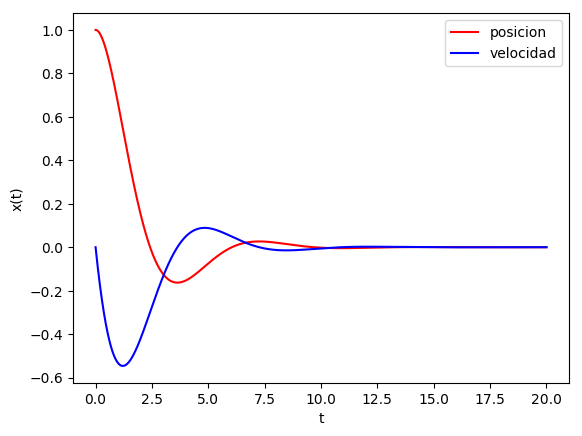

PyObject <matplotlib.legend.Legend object at 0x7fd040a13e10>

In [242]:
using PyPlot
xlabel("t")
ylabel("x(t)")
#title("Con Euler") 
plot(list,listx1, color ="red", label="posicion")                   
legend()
plot(list,listx2, color ="blue", label="velocidad")
legend()

k4 (generic function with 1 method)

RungaKutta (generic function with 1 method)

In [237]:
using PyPlot # Implementamos el metodo de Runge Kutta coma ya la habiamos hecho previamente
function rungeKutta(f::Function,list,x0)
    x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        t2 = i*h+h/2
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t2)
        k3 = f(x+(h/2)*k2,t2)
        k4 = f(x+h*k3,t)
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end
    

rungeKutta (generic function with 3 methods)

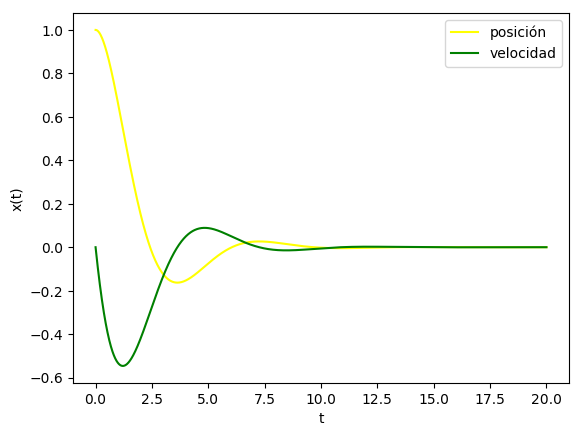

PyObject <matplotlib.legend.Legend object at 0x7fd0405bcdd0>

In [241]:
k=1
b=1
f(x,t) = [x[2],-k*x[1]-b*x[2]]    
list = 0:0.01:20;         
vec = rungeKutta(f,list,[1,0]);    
listx1 = map(x->x[1],vec);          
listx2 = map(x->x[2],vec);
using PyPlot
xlabel("t")
ylabel("x(t)")
#title("Con método de Runge Kutta orden 4") 
plot(list,listx1, color ="yellow", label="posición")                   
legend()
plot(list,listx2, color ="Green", label="velocidad");
legend()

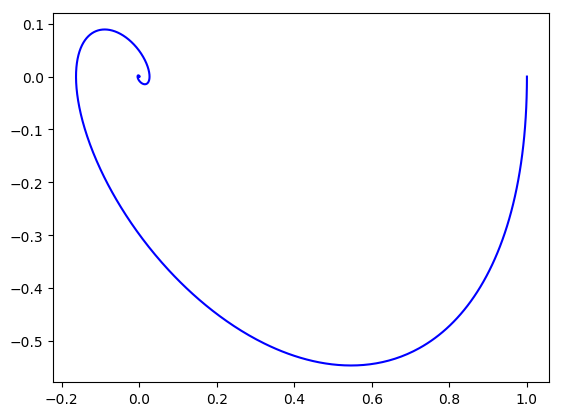

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd04149cb90>

In [240]:
# Ahora graficamos el espacio fase
Soluciones_RK4=rungeKutta(f,list,[1,0])


#Runge Kutta espacio fase
#title("Espacio fase Runge Kutta 4")
listx1_RK4 = map(x->x[1],Soluciones_RK4)          
listx2_RK4 = map(x->x[2],Soluciones_RK4)
plot(listx1_RK4,listx2_RK4,color="Blue" )





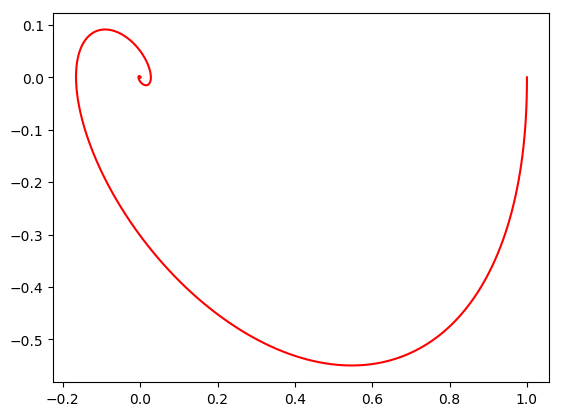

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd0426a0610>

In [73]:
Soluciones_Euler=metodo_euler2(f,list,[1,0])

#Euler espacio fase
listx1_Euler = map(x->x[1],Soluciones_Euler)          
listx2_Euler = map(x->x[2],Soluciones_Euler)
plot(listx1_Euler,listx2_Euler,color="Red" )

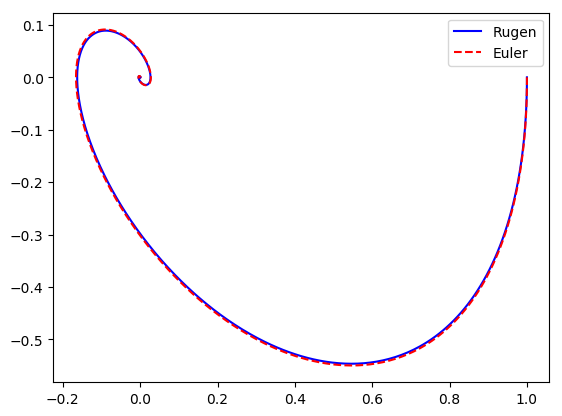

PyObject <matplotlib.legend.Legend object at 0x7fd042ad1dd0>

In [81]:


#Ahora los dos juntos
#Runge Kutta espacio fase
#title("Espacio fase Runge Kutta 4")
listx1_RK4 = map(x->x[1],Soluciones_RK4)          
listx2_RK4 = map(x->x[2],Soluciones_RK4)
plot(listx1_RK4,listx2_RK4,color="Blue", label="Rugen" )
legend()

#Euler espacio fase
listx1_Euler = map(x->x[1],Soluciones_Euler)          
listx2_Euler = map(x->x[2],Soluciones_Euler)
plot(listx1_Euler,listx2_Euler,color="Red", label="Euler","--")
legend()


## Ejercicio 2. Resolver el pendulo simple  usando RK-4. Graficar muchas condiciones iniciales en el espacio de fase


usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1.$ Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

$$l\theta=-g\sin\theta$$

In [87]:
#Pendulo simple
#Para graficar muchas condiciones iniciales
l=1

s(x,t)= [x[2],-(g/l)*sin(x[1])]    
list = 0:0.01:20;         
vec = rungeKutta(s,list,[1,0])  
listx1 = map(x->x[1],vec);          
listx2 = map(x->x[2],vec);
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Con Euler") 
plot(list,listx1, color ="red", label="grafica de la función")                   
legend()
plot(list,listx2, color ="blue", label="Derivada de la funcion");
legend()

LoadError: [91mMethodError: no method matching /(::#g, ::Int64)[0m
Closest candidates are:
  /([91m::BigInt[39m, ::Union{Int16, Int32, Int64, Int8, UInt16, UInt32, UInt64, UInt8}) at gmp.jl:380
  /([91m::BigFloat[39m, ::Union{Int16, Int32, Int64, Int8}) at mpfr.jl:339
  /([91m::PyCall.PyObject[39m, ::Any) at /home/felix/.julia/v0.6/PyCall/src/pyoperators.jl:11
  ...[39m

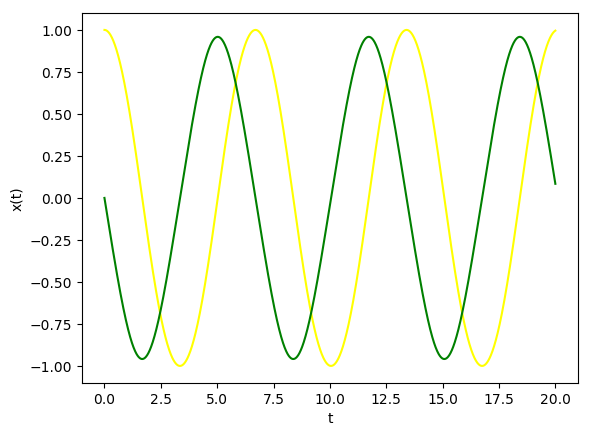

In [228]:

p(x,t)= [x[2],-sin(x[1])] 
list = 0:0.01:20;         
vec = rungeKutta(p,list,[1,0]);    
listx1_P = map(x->x[1],vec);          
listx2_P = map(x->x[2],vec);
using PyPlot
xlabel("t")
ylabel("x(t)")
#title("Con método de Runge Kutta orden 4") 
plot(list,listx1_P, color ="yellow")                   
legend()
plot(list,listx2_P, color ="Green" );
legend()

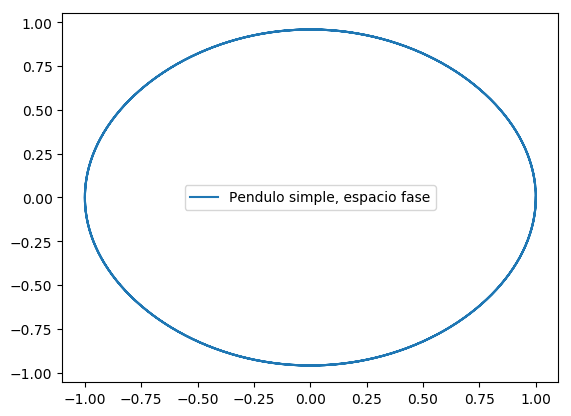

PyObject <matplotlib.legend.Legend object at 0x7fd041a41a90>

In [109]:
#Espacio fase con Runge
p(x,t)= [x[2],-sin(x[1])] 
list = 0:0.01:20;         
Soluciones_P = rungeKutta(p,list,[1,0]);    
listx1_P = map(x->x[1],Soluciones_P);          
listx2_P = map(x->x[2],Soluciones_P);


plot(listx1_P,listx2_P, label="Pendulo simple, espacio fase")
legend()


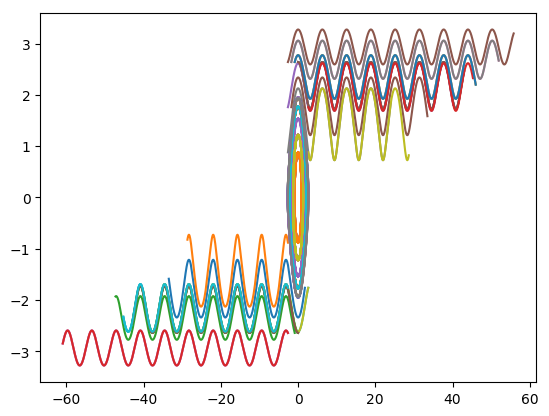

In [127]:
#Ahora con muchas condiciones iniciales

for i in 1:50
     w=0.88*rand(-3:3,2,1)
    p(x,t)= [x[2],-sin(x[1])] 
    list = 0:0.01:20         
    Soluciones_P = rungeKutta(p,list,w);    
    listx1_P = map(x->x[1],Soluciones_P);          
    listx2_P = map(x->x[2],Soluciones_P);


    plot(listx1_P,listx2_P)

end
    

__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

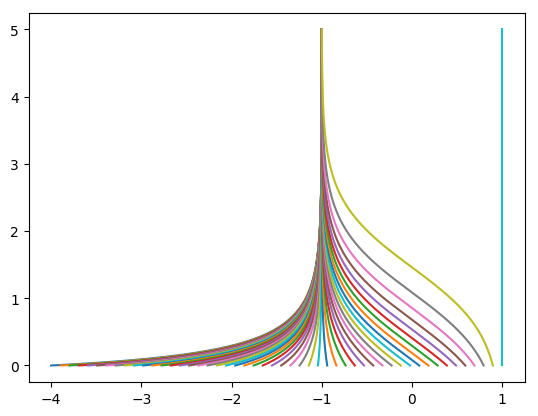

In [173]:

w=linspace(-4,1,50)


for i in 1:length(w)
    list = 0:0.01:20 
    Soluciones_ec = rungeKutta((x,t)->x^2-1,lista,w[i])   
    plot(Soluciones_ec,lista);
end


__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

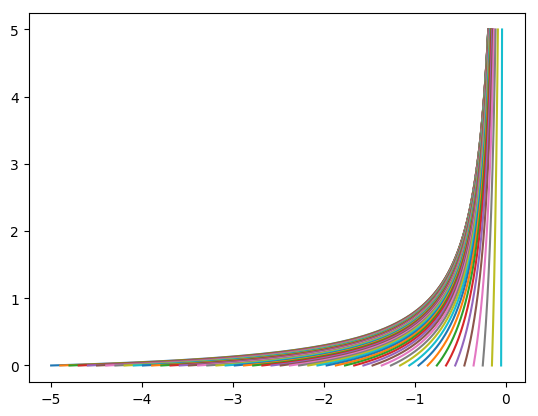

In [201]:
r=linspace(-5,5,100)

for i in 1:length(w)
    list = 0:0.01:5
    Soluciones_ec = rungeKutta((x,t)->x^2,list,r[i])   
    plot(Soluciones_ec,list);
end

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=c=1$, $b=d=0$
* $a=c=-1$, $b=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

In [226]:

function ultimate(a,b,c,d)
ñ(x,t) = [a*x[1]+b*x[2],c*x[1]+d*x[2]] 
list=-10:0.01:5                        
for i in 1:50                          
    w = 0.5*rand(-10:10,2,1)           
    Solucion_ultim = rungeKutta(ñ,list,w); 
    listx1_U = map(x->x[1],Solucion_ultim);   
    listx2_U= map(x->x[2],Solucion_ultim); 
        
    xlim(-5,5)
    ylim(-5,5)    
    plot(listx1_U,listx2_U);
    
end
end










ultimate (generic function with 1 method)

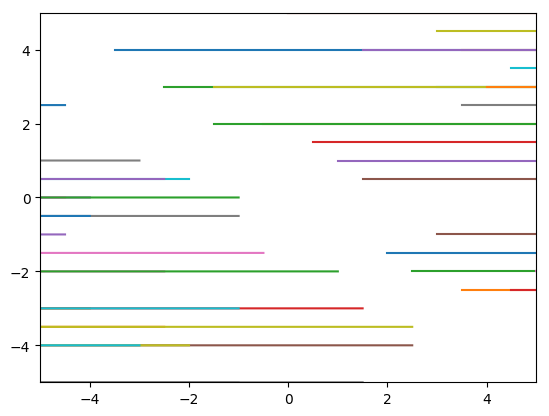

In [227]:
ultimate(1,1,0,0)


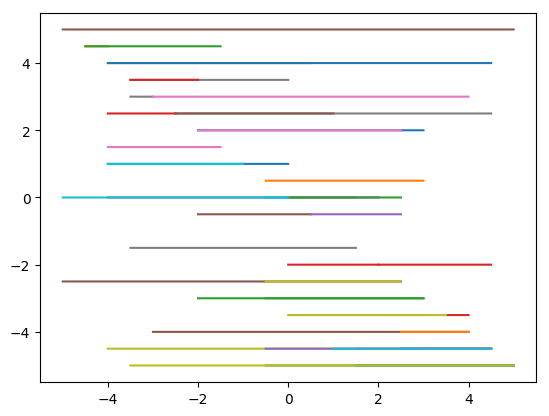

In [216]:
ultimate(-1,-1,0,0)

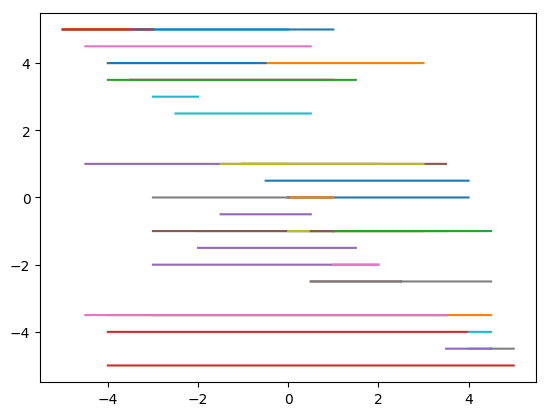

In [217]:
ultimate(-2,-2,0,0)

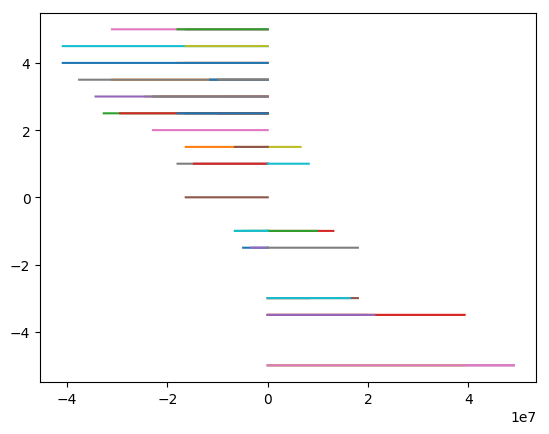

In [219]:
ultimate(1,-2,0,0)

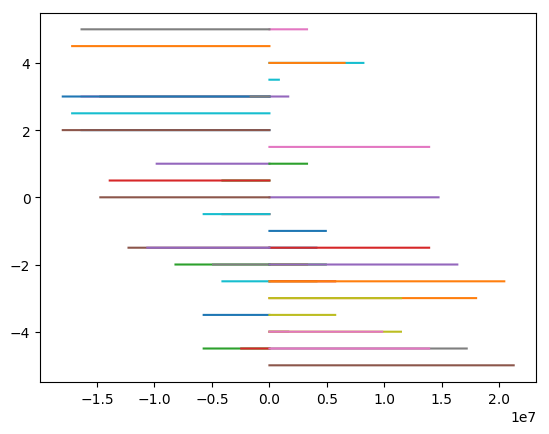

In [220]:
ultimate(1,-0.5,0,0)

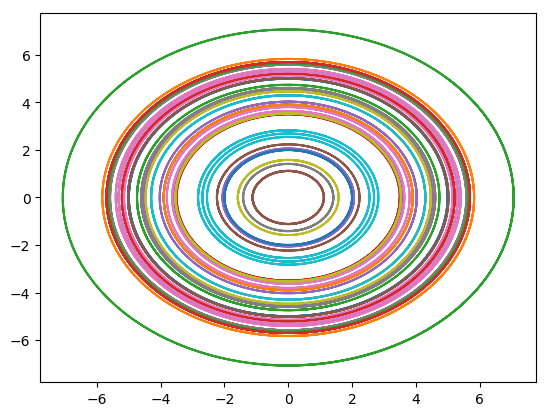

In [218]:
ultimate(0,1,-1,0)

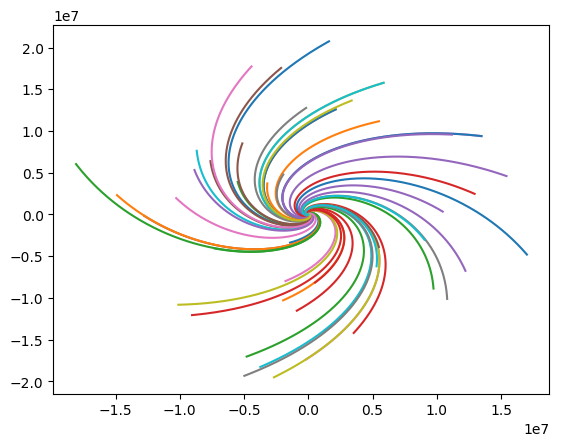

In [221]:
ultimate(1,1,-1,1)

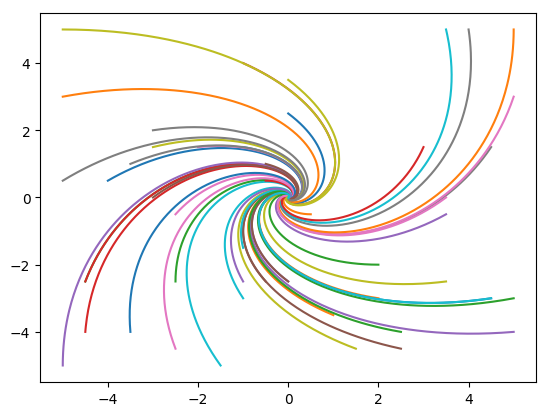

In [222]:
ultimate(-1,1,-1,-1)

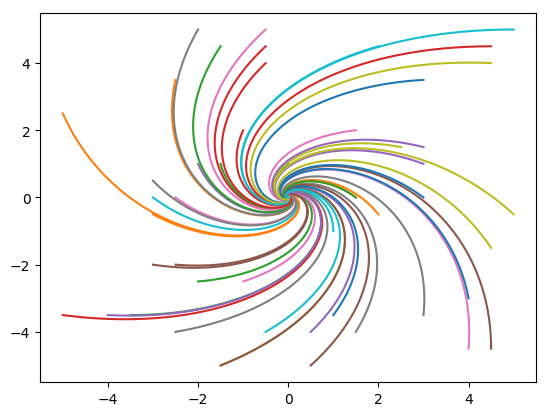

In [223]:
ultimate(-1,-1,1,-1)

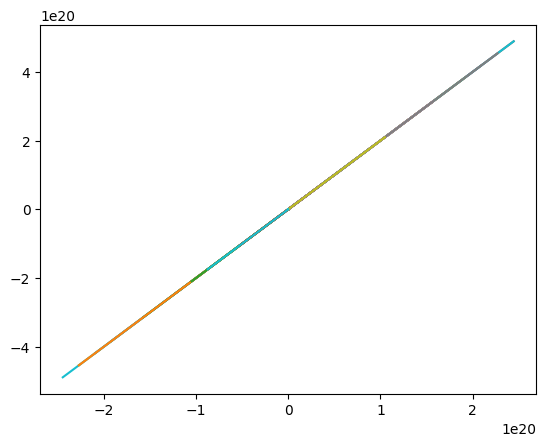

In [224]:
ultimate(1,1,-2,4)

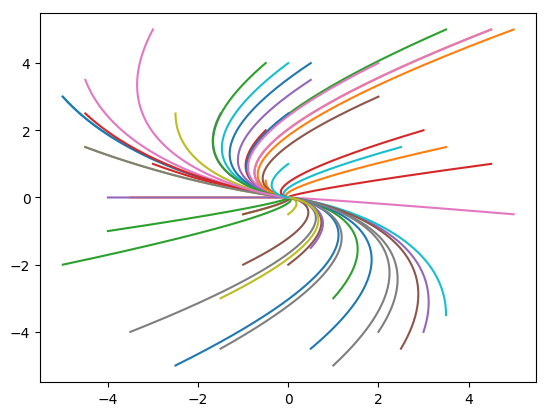

In [225]:
ultimate(-1,-1,0,-1)